In [10]:
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from scipy import stats
%matplotlib inline

* preprocessing.StandardScaler
* preprocessing.MinMaxScaler
* model_selection.cross_val_score
* preprocessing.QuantileTransformer - преобразует любое распределение к нормальному 
* preprocessing.PolynomialFeatures - создание синтетических признаков

### Заполнение пропусков

учимся работать с nan 

In [11]:
preprocessing.Imputer?

In [26]:
X = np.array([[1, 2], [np.nan, 3], [7, 6]])
X

array([[ 1.,  2.],
       [nan,  3.],
       [ 7.,  6.]])

In [21]:
imp = preprocessing.Imputer(missing_values=np.nan, strategy='mean', verbose=0)
imp.fit(X) # fit просто нашел среднее и записал его куда-то

Imputer(axis=0, copy=True, missing_values=nan, strategy='mean', verbose=0)

In [22]:
Y = np.array([[np.nan, 2], [6, np.nan], [7, 6]])

In [23]:
Y # тестовая выборка

array([[nan,  2.],
       [ 6., nan],
       [ 7.,  6.]])

In [24]:
print('трансформированный исходный массив\n', imp.transform(X))
print('трансформированный новый массив\n', imp.transform(Y))

трансформированный исходный массив
 [[1. 2.]
 [4. 3.]
 [7. 6.]]
трансформированный новый массив
 [[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


In [31]:
df = pd.DataFrame([['b', 'x'],
                   [np.nan, 'y'],
                   ['a', np.nan],
                   ['b', 'y']], dtype='category')




In [32]:
df

,0,1
0,b,x
1,NaN,y
2,a,NaN
3,b,y


In [33]:
df.fillna(method='ffill')

,0,1
0,b,x
1,b,y
2,a,y
3,b,y


In [35]:
df.dropna()

,0,1
0,b,x
3,b,y


### Отбор признаков

отфильтровываем признаки, которые точно не понадобятся

Сколько нужно наблюдений? нам нужно 1. избежать переобучения, 2. сэкономить деньги компании, минимум наблюдений

факторы(f)
наблюдения(o)

Правила:
1. если o/f >= 100 , то все хорошо, переобучения гарантированно не будет. 
То есть если 20 факторов, то нужно 2000 наблюдений. 2000/20

2. если 100 > o/f >= 10, то это минимальный порог, при котором можно избежать переобучения. То есть 20 наблюдений - это край.





In [38]:
from sklearn import feature_selection as fs

In [39]:
fs.SelectKBest

sklearn.feature_selection.univariate_selection.SelectKBest

### Предсказание рейтинга рецептов

In [89]:
df =pd.read_csv('epi_r.csv')

In [90]:
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
df.drop('title', axis=1, inplace=True)

In [92]:
y = np.array(df['rating'])

In [93]:
y

array([2.5  , 4.375, 3.75 , ..., 4.375, 4.375, 4.375])

In [94]:
df.drop('rating', axis=1, inplace=True)

In [95]:
df.head()

,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
df.calories.isna().sum()

4117

In [102]:
X = df.values

In [104]:
X.shape # 20052

(20052, 678)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [106]:
X_train_full = np.c_[X_train, y_train]

In [107]:
X_train_full.shape

(13434, 679)

In [108]:
X_train_full_filtered = X_train_full[(X_train_full[:, 0] < 3358000)|(np.isnan(X_train_full[:, 0]))]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [109]:
X_train_full_filtered.shape

(13427, 679)

In [125]:
y_train = X_train_full_filtered[:, -1] # обратно получили y из объединенного массива

In [126]:
X_train = X_train_full_filtered[:, :-1]  # обратно получили X из объединенного массива

In [129]:
imp = preprocessing.Imputer(missing_values=np.nan, strategy='mean', verbose=0)
imp.fit(X_train)

Imputer(axis=0, copy=True, missing_values=nan, strategy='mean', verbose=0)

In [131]:
X_train_filledna = imp.transform(X_train)

In [135]:
X_test_filledna = imp.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


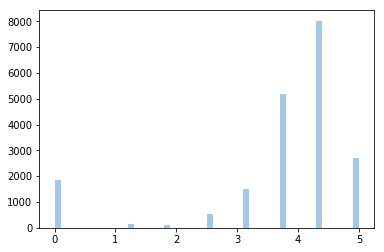

In [136]:
sns.distplot(y, kde=False)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


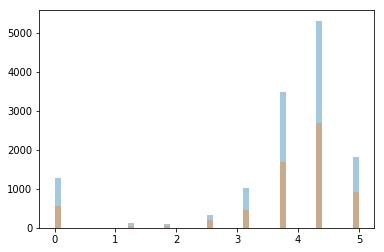

In [138]:
sns.distplot(y_train, kde=False)
sns.distplot(y_test, kde=False)
plt.show()


In [139]:
lr = linear_model.LinearRegression()

In [142]:
lr.fit(X_train_filledna, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [143]:
lr.coef_

array([-4.77305927e-05,  7.27195440e-04,  6.53077665e-04, -2.51783530e-06,
        8.76619787e-02,  1.94153121e+00,  1.00865802e+00, -1.23329738e+00,
        3.42165884e-01, -1.89306393e-01, -3.48804959e-01, -1.35275905e-02,
       -4.46294066e-01,  1.14301006e-01,  4.25971002e-01, -1.17862355e-01,
        1.30631825e-01, -1.41886705e-01, -4.03162586e-01, -1.13781208e+00,
       -1.13909618e-02,  4.61885542e-02, -1.84106214e-01,  5.69330688e-02,
        1.59052509e-01, -6.48136655e-02,  2.09502613e-01, -8.25114679e-01,
        1.29250298e-01,  5.24208516e+08,  3.43512153e-01,  8.87005855e-03,
        3.37989006e-02,  1.57491544e-01,  1.34748623e-01,  8.63166653e-02,
        1.53150341e-01, -1.97829393e-01,  4.16730729e-02,  3.81066347e-02,
        5.68970221e-02,  2.39549069e-01,  9.08826235e-02,  9.37438569e-02,
        1.07221880e-01,  6.08974334e-01,  3.23122835e-01, -8.99912715e-03,
        1.10195527e-01,  1.77183690e-02, -4.16623028e-02,  2.12104633e-01,
        1.71343878e-01,  

In [148]:
X_test[0]

array([6.130e+02, 3.800e+01, 2.600e+01, 1.055e+03, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 

In [149]:
lr.predict([X_test[0]])

array([3.30865531])

In [150]:
y_test[0]

4.375

In [152]:
from sklearn import metrics

In [154]:
predicts_test = lr.predict(X_test)
predicts_train = lr.predict(X_train_filledna)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').